In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-17 15:22:13--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-17 15:22:13 (6.80 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [3]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [4]:
# read in the data as a Data Frame
data_csv = pd.read_csv('moore.csv', header=None)
data_csv.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [5]:
# but we work with numpy arrays for regression problems
data = data_csv.values
print(data)

[[       1971        2300]
 [       1972        3500]
 [       1973        2500]
 [       1973        2500]
 [       1974        4100]
 [       1974        4500]
 [       1974        8000]
 [       1975        3510]
 [       1976        5000]
 [       1976        8500]
 [       1976        6500]
 [       1978        9000]
 [       1978       29000]
 [       1979       17500]
 [       1979       29000]
 [       1979       68000]
 [       1981       11500]
 [       1982       55000]
 [       1982      134000]
 [       1983       22000]
 [       1984       63000]
 [       1984      190000]
 [       1985      275000]
 [       1985       25000]
 [       1985       16000]
 [       1986      110000]
 [       1986      375000]
 [       1986       30000]
 [       1987      385000]
 [       1987      730000]
 [       1987      273000]
 [       1987      553000]
 [       1988      180000]
 [       1988      250000]
 [       1989      600000]
 [       1989     1000000]
 [       1989     1180235]
 

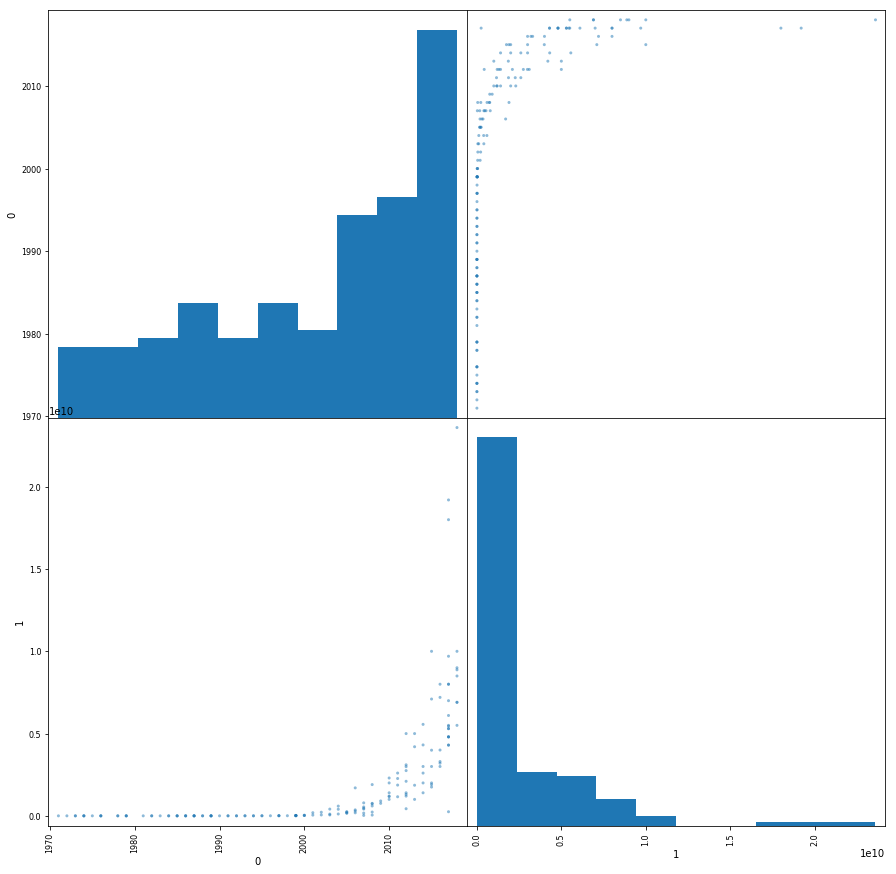

In [6]:
plt.rcParams['figure.figsize'] = [15, 15]
pd.plotting.scatter_matrix(data_csv);

In [7]:
# flatten the data -- vectorization
# reshape the data so that it is now a 2D-array NxD where D=1
X = data[:, 0].reshape(-1, 1) 

y = data[:, 1]

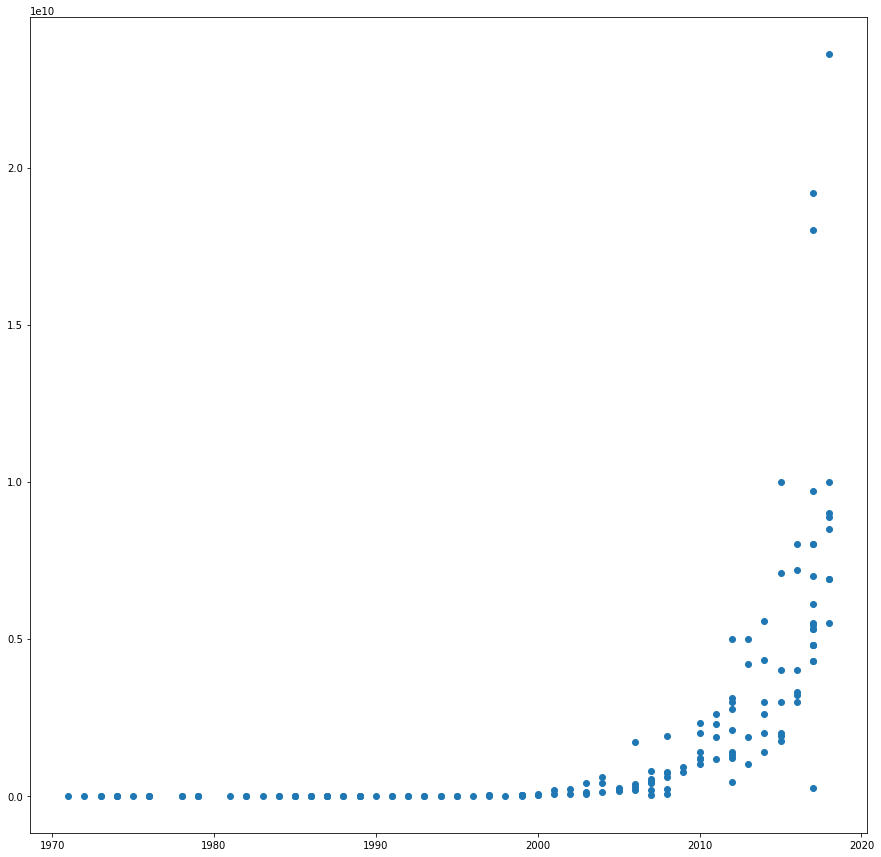

In [8]:
# How the number of CPUs on a device evolves as function of year
plt.scatter(X, y);

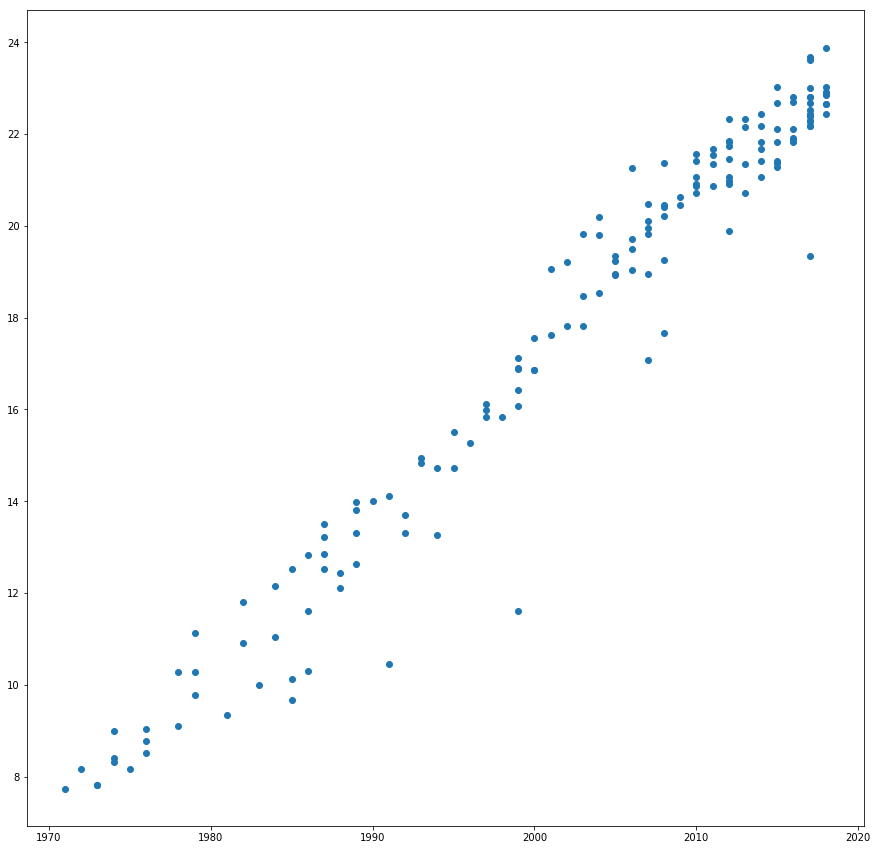

In [9]:
# to have a better feeling of the linear dependency
# we also plot the logarithmic relation
y_log = np.log(y)
plt.scatter(X, y_log);

In [12]:
# since the numbers are large and
# their relative values are more important than the exact year
# in order to avoid gradients to explode in the training
# we center them around their mean value
##### this would also make the numbers smaller
##### in case of scaling, we would have to scale back afterwards which 
##### is more complex as just adding the mean aftwerwads
x_m = X.mean()
X = X - x_m

In [13]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42
                                                   )

In [14]:
np.shape(X_train)

(108, 1)

In [15]:
import tensorflow as tf

In [16]:
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.Input(shape=(1,)))
Model.add(tf.keras.layers.Dense(1, activation=None))

In [17]:
Model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [18]:
# how the fitting react to the fitting parameters
# after some epoch the learning rate will be reduced exponentially
def scheduler(epoch, lr):
    if epoch < 90:
        return lr
    else:
        return 0.0001
        #return lr*tf.math.exp(-0.1)
    
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
Model.fit(X, y_log, epochs=200, callbacks=[callback])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 2ms/sample - loss: 496.8086
Epoch 2/200
162/162 [==============================] - 0s 108us/sample - loss: 375.5817
Epoch 3/200
162/162 [==============================] - 0s 130us/sample - loss: 355.7610
Epoch 4/200
162/162 [==============================] - 0s 223us/sample - loss: 201.4948
Epoch 5/200
162/162 [==============================] - 0s 151us/sample - loss: 346.7780
Epoch 6/200
162/162 [==============================] - 0s 95us/sample - loss: 371.4593
Epoch 7/200
162/162 [==============================] - 0s 117us/sample - loss: 157.5879
Epoch 8/200
162/162 [==============================] - 0s 205us/sample - loss: 109.1305
Epoch 9/200
162/162 [==============================] - 0s 114us/sample - loss: 54.7934
Epoch 10/200
162/162 [==============================] - 0s 83us/sample - loss: 29.8327
Epoch 11/200
162/162 [==============================] - 0s 153us/sample - loss: 31.3340
Epoch 12/200
162

162/162 [==============================] - 0s 162us/sample - loss: 0.8822
Epoch 95/200
162/162 [==============================] - 0s 197us/sample - loss: 0.8871
Epoch 96/200
162/162 [==============================] - ETA: 0s - loss: 0.611 - 0s 186us/sample - loss: 0.8739
Epoch 97/200
162/162 [==============================] - 0s 192us/sample - loss: 0.8848
Epoch 98/200
162/162 [==============================] - 0s 176us/sample - loss: 0.8919
Epoch 99/200
162/162 [==============================] - 0s 163us/sample - loss: 0.8753
Epoch 100/200
162/162 [==============================] - 0s 193us/sample - loss: 0.8883
Epoch 101/200
162/162 [==============================] - 0s 159us/sample - loss: 0.8958
Epoch 102/200
162/162 [==============================] - 0s 138us/sample - loss: 0.8777
Epoch 103/200
162/162 [==============================] - 0s 173us/sample - loss: 0.8727
Epoch 104/200
162/162 [==============================] - 0s 137us/sample - loss: 0.8703
Epoch 105/200
162/162 [====

162/162 [==============================] - 0s 114us/sample - loss: 0.8823
Epoch 188/200
162/162 [==============================] - 0s 116us/sample - loss: 0.8719
Epoch 189/200
162/162 [==============================] - 0s 131us/sample - loss: 0.8709
Epoch 190/200
162/162 [==============================] - 0s 90us/sample - loss: 0.8706
Epoch 191/200
162/162 [==============================] - 0s 147us/sample - loss: 0.8731
Epoch 192/200
162/162 [==============================] - 0s 139us/sample - loss: 0.8682
Epoch 193/200
162/162 [==============================] - 0s 119us/sample - loss: 0.9293
Epoch 194/200
162/162 [==============================] - 0s 140us/sample - loss: 0.9519
Epoch 195/200
162/162 [==============================] - 0s 142us/sample - loss: 0.8685
Epoch 196/200
162/162 [==============================] - 0s 144us/sample - loss: 0.8776
Epoch 197/200
162/162 [==============================] - 0s 222us/sample - loss: 0.8751
Epoch 198/200
162/162 [========================

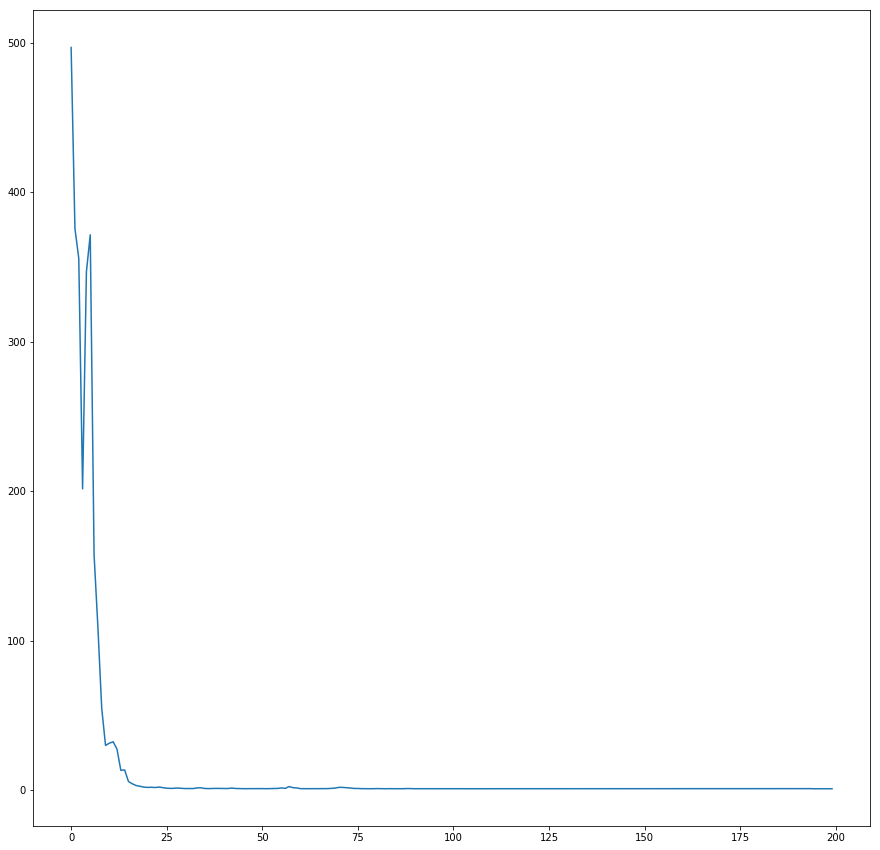

In [19]:
plt.plot(Model.history.history['loss'], label='loss');

In [20]:
Model.layers[0].get_weights()

[array([[0.34233677]], dtype=float32), array([17.760359], dtype=float32)]

Model Predictions

The approach to evaluate the performance of a linear regression model

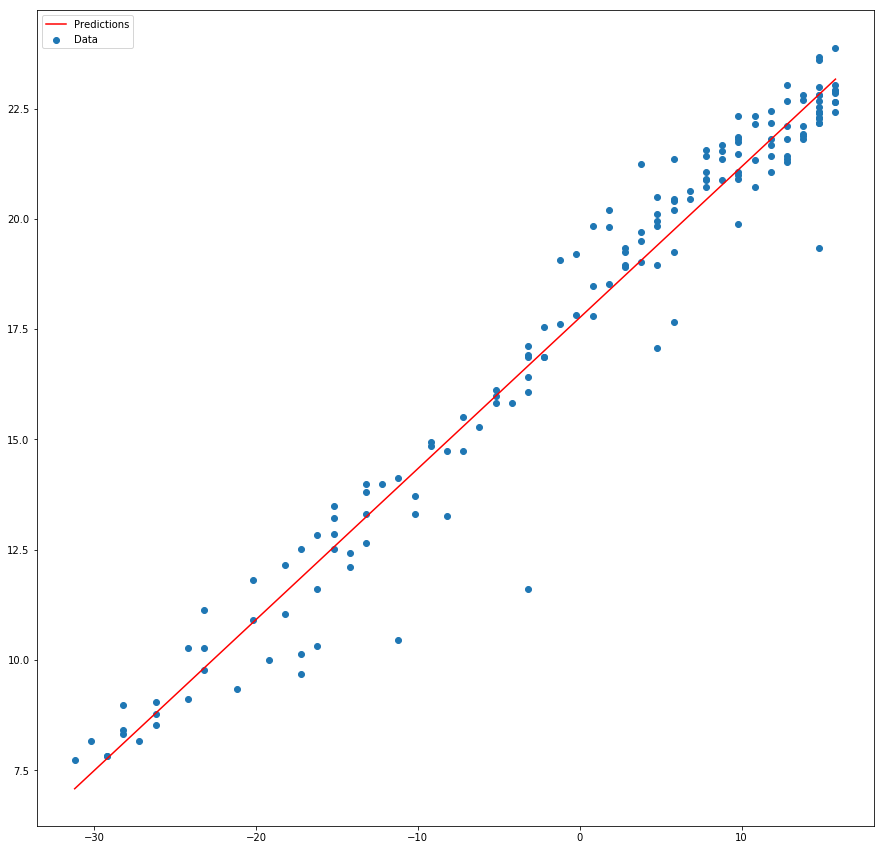

In [21]:
# we flatten the predictions as they are stored as nupmy arrays
# but our output OR y is a 1D vector
pred = Model.predict(X).flatten()
pred
# we plot the predictions Vs. actual values
plt.scatter(X, y_log, label='Data')
plt.plot(X, pred, c='red', label='Predictions')
plt.legend()

We now get back to our original question, and that is if the Moore law is true?

In [22]:
# a, b = weight, b
a, b = Model.layers[0].get_weights()
print(a, b)

[[0.34233677]] [17.760359]


In [23]:
# rate of growth is r = exp(a)
r = np.exp(a)
print(r)

[[1.4082345]]


In [24]:
# which as expected is almost 2 years
print('time to double:', np.log(2)/np.log(r))

time to double: [[2.0247524]]


In [25]:
# We can prove this through analytical solution
X = np.array(X).flatten()
# better to work with y_log to make sure the relationship between 
# X and Y are linear
y_log = np.array(y_log)
denom = X.dot(X) - X.mean() * X.sum()

a = ( X.dot(y_log) - y_log.mean()*X.sum() ) / denom
b = (y_log.mean() * X.dot(X) - X.mean() * X.dot(y_log) ) / denom
print(a, b, denom)

0.3416824873873132 17.76493939363179 30173.67901234568


In [26]:
# which as expected is almost 2 years from the analytical approach
print('time to double:', np.log(2)/a)

time to double: 2.028629520523919


In [37]:
# Now we have the coefficients
a, b = Model.layers[0].get_weights()
print('W = ', a, '\nb = ', b)

# we can manually calculate the final results
# and see how the model performs

# first we reshaper the X to get its original shape
X = X.reshape(-1, 1)

# calculate the prediction
pred2 = (X.dot(a) + b).flatten()

# Now compare model.predict() with manual prediction
np.allclose(pred, pred2)

W =  [[0.34233677]] 
b =  [17.760359]


True